In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('data/train/combined_data.csv')
data

,accelerometer_x_mean,accelerometer_x_std,accelerometer_x_mean_abs_dev,accelerometer_x_minval,accelerometer_x_maxval,accelerometer_x_median,accelerometer_x_median_abs_dev,accelerometer_x_iqr,accelerometer_x_neg_count,accelerometer_x_pos_count,...,totalAcceleration_z_magnitude,class,mean_roll,mean_pitch,mean_yaw,mean_loudness,latitude,longitude,altitude,avg_speed
0,-0.001260,0.001257,0.000947,-0.004630,0.001396,-0.000990,0.000613,0.001321,57,6,...,0,Home,0.018988,0.024817,1.100308,-142.566799,40.384822,-86.915484,160.099991,0.364834
1,-0.000180,0.000877,0.000719,-0.002075,0.001861,-0.000156,0.000629,0.001280,35,28,...,0,Home,0.019220,0.024595,1.100115,-145.759039,40.384829,-86.915457,160.099991,0.094123
2,0.000146,0.001154,0.000869,-0.003055,0.001947,0.000386,0.000562,0.001122,24,39,...,0,Home,0.019120,0.024619,1.100041,-146.925705,40.384829,-86.915463,160.099991,0.025573
3,0.000316,0.001387,0.001059,-0.003055,0.004447,0.000459,0.000796,0.001516,21,42,...,0,Home,0.019082,0.024789,1.100471,-143.621473,40.384837,-86.915463,160.099991,0.018291
4,0.000539,0.001247,0.000989,-0.001843,0.004447,0.000446,0.000737,0.001453,19,44,...,0,Home,0.019243,0.024712,1.100432,-130.988536,40.384837,-86.915469,160.099991,0.016061
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,-0.000076,0.001793,0.001250,-0.003240,0.006729,-0.000075,0.000946,0.001674,22,15,...,0,Classroom,0.000442,0.027307,2.436005,-107.230856,40.427986,-86.911006,149.399994,0.064797
475,-0.000009,0.001474,0.001097,-0.003477,0.003438,-0.000064,0.000886,0.001733,21,16,...,0,Classroom,0.000509,0.026907,2.435717,-100.356607,40.427988,-86.911008,149.399994,0.069565
476,0.000077,0.001739,0.001384,-0.003482,0.003438,0.000200,0.001161,0.002282,18,19,...,0,Classroom,-0.000037,0.027491,2.438875,-93.284910,40.427991,-86.911010,149.399994,0.020479
477,0.000396,0.002833,0.001961,-0.007956,0.007318,0.000200,0.001262,0.002565,16,21,...,0,Classroom,-0.001209,0.026786,2.425664,-99.636261,40.427991,-86.911010,149.399994,0.020901


In [6]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
data['class'] = LE.fit_transform(data['class'])

d:\Anaconda\envs\MDL2\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


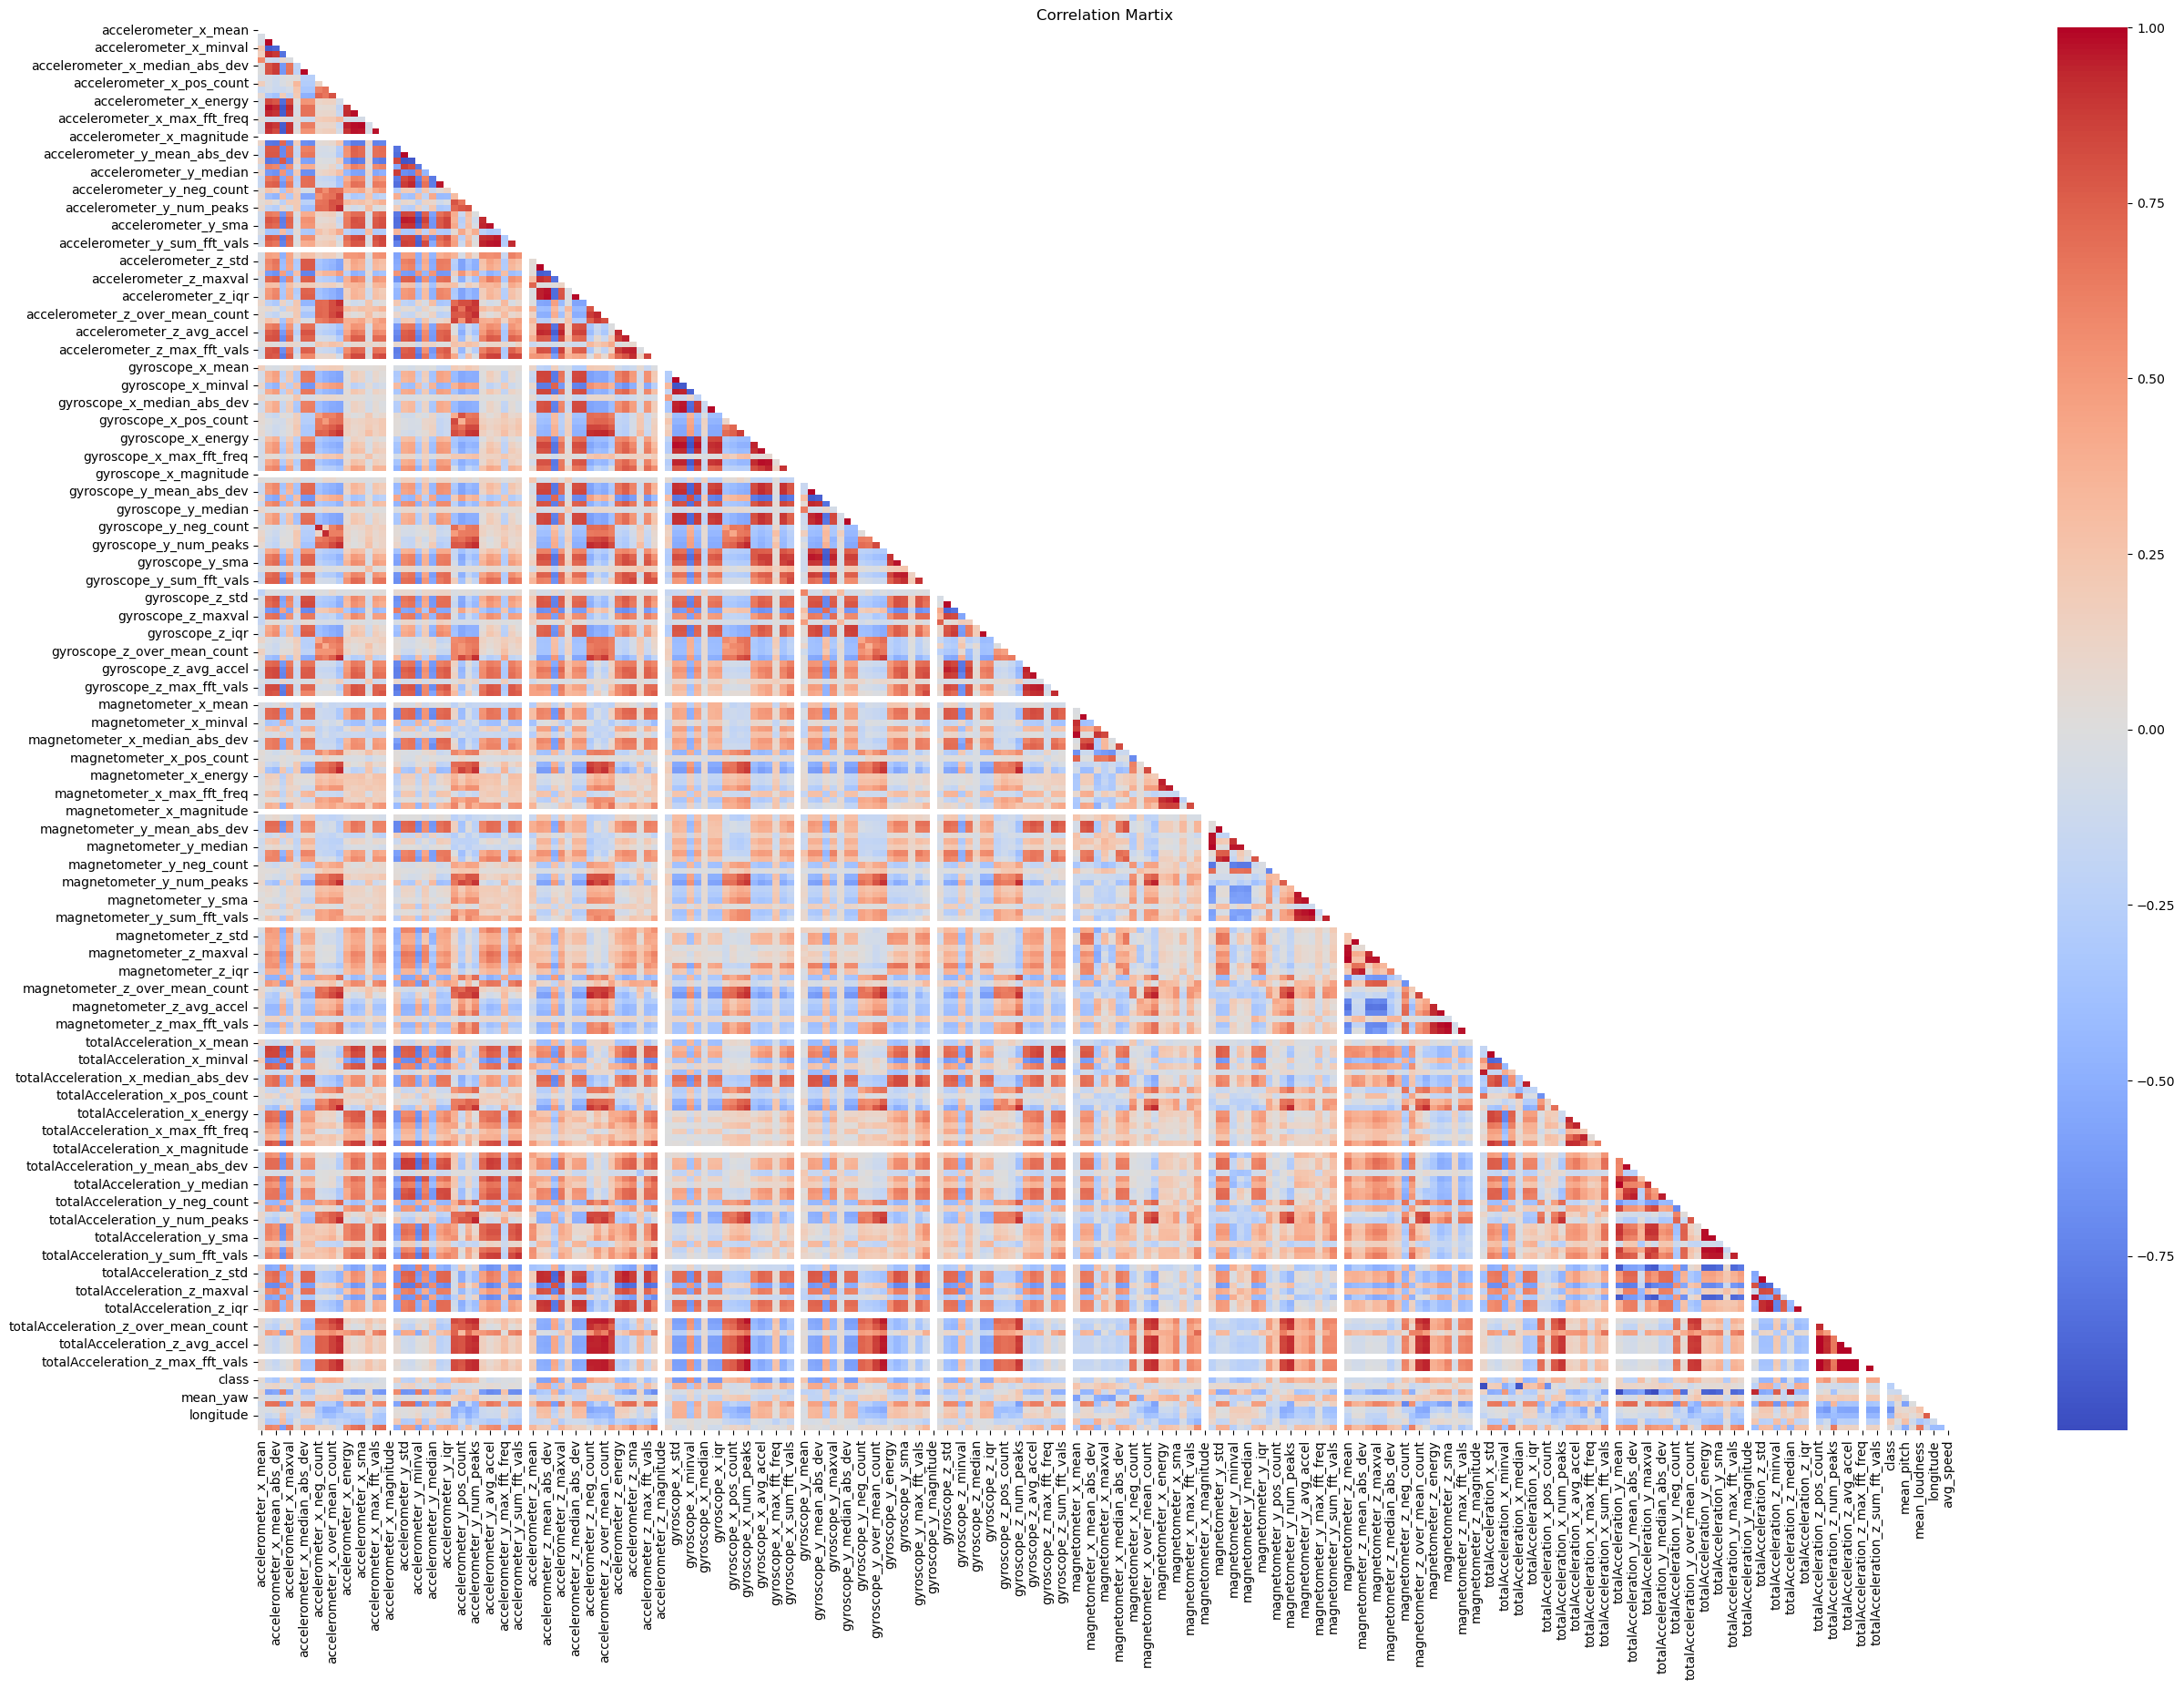

In [7]:
# correlation matrix for feature selection
c = data.corr()
mask = np.triu(np.ones_like(c, dtype=bool))

plt.figure(figsize=(30, 20))
sns.heatmap(c, annot=True, cmap='coolwarm', fmt=".2f", mask=mask)
plt.title('Correlation Martix')
plt.show()